# Advanced Text Analytics Lab 1

This notebook is the first of two lab notebooks that you will submit as part of your assessment for the Advanced Data Analytics unit. 

This notebook is contains three sections:
1. **Word embeddings:** This will introduce you to loading and training word embeddings using the Gensim library.
2. **Introducing neural text classifiers:** Here we show you how to construct a neural network text classifier for sentiment analysis using Pytorch. 
3. **Improving neural text classifiers:** This section gives you a chance to improve the classifier from the previous section by applying what we have learned in the lectures.

## Learning Outcomes

These sections will contain tutorial-like instructions, as you have seen in previous text analytics labs. On completing these sections, the intended learning outcomes are that you will be able to...
1. Load pretrained word embeddings models.
1. Learn word embeddings from an unlabelled dataset.
1. Recognise the steps required to train and test a neural text classifier with Pytorch
1. Adapt the architecture of a neural text classifier.

## Your Tasks

Inside each of these sections there are several **'To-do's**, which you must complete for your summative assessment. Your marks will be based on your answers to these to-dos. Please make sure to:
1. Include the output of your code in the saved notebook. Plots and printed output should be visible without re-running the code. 
1. Include all code needed to generate your answers.
1. Provide sufficient comments to understand how your method works.
1. Write text in a cell in markdown format where a written answer is required. You can convert a cell to markdown format by pressing Escape-M. 

There are also some unmarked 'to-do's that are part of the tutorial to help you learn how to implement and use the methods studied here.

## Marking Criteria

1. The coursework (both notebooks) is worth 30% of the unit in total. 
1. There is a total of 100 marks available for both lab notebooks. 
1. This notebook is worth 66 of those marks.
1. The number of marks for each to-do out of 100 is shown alongside each to-do.
1. For to-dos that require you to write code, a good solution would meet the following criteria (in order of importance):
   1. Solves the task or answers the question asked in the to-do. This means, if the code cells in the notebook are executed in order, we will get the output shown in your notebook.
   1. The code is easy to follow and does not contain unnecessary steps.
   1. The comments show that you understand how your solution works.
   1. A very good answer will also provide code that is computationally efficient but easy to read.
1. You can use any suitable publicly available libraries. Unless the task explicitly asks you to implement something from scratch, there is no penalty for using libraries to implement some steps.

## Support

The main source of support will be during the remaining lab sessions (Fridays 2-5pm) for this unit. 

The TAs and lecturer will help you with questions about the lectures, the code provided for you in this notebook, and general questions about the topics we cover. For the marked 'to-dos', they can only answer clarifying questions about what you have to do. 

Office hours: You can book office hours with Edwin on Tuesdays 3pm-5pm by sending him an email (edwin.simpson@bristol.ac.uk). If those times are not possible for you, please contact him by email to request an alternative. 

## Deadline

The notebook must be submitted along with the second notebook on Blackboard before **Wednesday 11th May at 13.00**. 

# 0. Packages

There are some additional packages you need for this lab. There are two options: set up a new environment using the crossplatform_environment.yml file provided on Blackboard, or install the extra packages into your existing data_analytics Conda environment using, e.g., `conda install pytorch`. The packages are:
  * pytorch=1.9.0
  * scipy=1.8.0
  * numpy=1.22.2
  * tqdm=4.62.3
  * transformers=2.1.1
  * matplotlib-base=3.5.1
  * matplotlib-inline=0.1.3

# 1. Word Embeddings (max. 26 marks)

In this section we will use both sparse vectors and dense word2vec embeddings to obtain
vector representations of words and documents. 

First, we will load the `tweet eval` sentiment dataset.

In [1]:
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

In [2]:
from datasets import load_dataset
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="train",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Training dataset with {len(train_dataset)} instances loaded")


dev_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="validation",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Development/validation dataset with {len(dev_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="test",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Test dataset with {len(test_dataset)} instances loaded")

# Put the data into lists ready for the next steps...
train_texts = []
train_labels = []
for i in tqdm(range(len(train_dataset))):
    train_texts.append(train_dataset[i]['text'])
    train_labels.append(train_dataset[i]['label'])
            
# HINT: A count vectorizer object may be useful in later steps
vectorizer = CountVectorizer()
vectorizer.fit(train_texts)

# Get the vocabulary
vocab = vectorizer.vocabulary_
vocab_size = len(vocab)
print(f'The vocabulary has {vocab_size} words')

# invert the vocabulary dictionary so we can look up word types given an index
keys = vocab.values()
values = vocab.keys()
vocab_inverted = dict(zip(keys, values))

print(f'Index of "happy" is {vocab["happy"]}')

Reusing dataset tweet_eval (./data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Training dataset with 45615 instances loaded


Reusing dataset tweet_eval (./data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Development/validation dataset with 2000 instances loaded


Reusing dataset tweet_eval (./data_cache\tweet_eval\sentiment\1.1.0\12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Test dataset with 12284 instances loaded


100%|██████████| 45615/45615 [00:05<00:00, 9071.96it/s]


The vocabulary has 43358 words
Index of "happy" is 17184


## 1.1. Term-Document Matrix

First we are going to obtain sparse word vectors from a term-document matrix.

**TO-DO 1.1a**: Create a term-document matrix for the training set. **Rows must correspond to terms, and columns to documents.** **(2 marks)**

In [3]:
# WRITE YOUR ANSWER HERE
termDocMat_train = vectorizer.transform(train_texts).T
print(termDocMat_train.shape)

(43358, 45615)


**TO-DO 1.1b:** Write a function that takes a word as an argument and returns its term vector from the term-document matrix you computed. Get the term vector for 'happy' **as a row vector**. **(3 marks)**

In [4]:
# WRITE YOUR ANSWER HERE
def get_termVector(term):
     return termDocMat_train[vocab[term]]
happy_vec = get_termVector("happy")
print(happy_vec.shape)

(1, 45615)


**TODO 1.1c:** Use the term vectors given by the term-document matrix to identify the five most similar words to 'happy'. **(3 marks)**

In [5]:
from scipy.spatial.distance import cdist  # this may be a useful function
# I will use euclidean distance to comput the similarity
# WRITE YOUR OWN CODE HERE
def get_Top5Similar(term_docMaxtirx, term):
    dis_idx_list = []
    target_v = get_termVector(term)
    for index, term_v in enumerate(term_docMaxtirx):
        dis_idx_list.append((index, cdist(target_v.A, term_v.A, 'euclidean')[0][0]))
    top5_similar = [(vocab_inverted[i[0]],i[1]) for i in sorted(dis_idx_list, key=lambda x:x[1])[1:6]]  # remove the detected term
    return top5_similar

top5_happy_term = get_Top5Similar(termDocMat_train, 'happy')
print(top5_happy_term)


[('1966', 31.25699921617557), ('aoo', 31.272991542223778), ('betch', 31.272991542223778), ('cutie', 31.272991542223778), ('happybirthdayprincegeorge', 31.272991542223778)]


## 1.2 Word Embeddings

Now, we will use Gensim to train a word2vec model. The code below tokenizes the training texts, then runs word2vec (the skipgram model) to learn a set of embeddings. 

In [6]:
from gensim.models import word2vec
from gensim.utils import tokenize

tokenized_texts = [list(tokenize(text)) for text in train_texts]
emb_model = word2vec.Word2Vec(tokenized_texts, sg=1, min_count=1, window=3, vector_size=100)

In [7]:
# get the word vector for 'happy'
happy_embedding = emb_model.wv['happy']
print(happy_embedding.shape)

(100,)


TODO 1.2a: Find the five most similar words to 'happy' according to your word2vec model. You can use the Gensim function `similar_by_word` to do this. (this task is unmarked)

In [8]:
# WRITE YOUR OWN CODE HERE
print(emb_model.wv.similar_by_word('happy',topn=5))

[('cute', 0.8785979151725769), ('busy', 0.8619716167449951), ('sweet', 0.8607420325279236), ('idc', 0.8588870167732239), ('blessed', 0.8585744500160217)]


Above, we trained our own model using the skipgram method. We can also download a pretrained model that has previously been trained on a large corpus. There is a list of models available [here](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models). Let's try out GLoVe embeddings. GLoVe is an alternative to the skipgram model. This model was trained on a corpus of tweets:

In [9]:
import gensim.downloader

glove_wv = gensim.downloader.load('glove-twitter-25')

# show the vector for Hamlet:
print(glove_wv['happy'])

[-1.2304   0.48312  0.14102 -0.0295  -0.65253 -0.18554  2.1033   1.7516
 -1.3001  -0.32113 -0.84774  0.41995 -3.8823   0.19638 -0.72865 -0.85273
  0.23174 -1.0763  -0.83023  0.10815 -0.51015  0.27691 -1.1895   0.98094
 -0.13955]


TODO 1.2b: Find the most similar five words to 'happy' according to the GloVe Twitter model. (this task is unmarked)

In [10]:
# WRITE YOUR OWN CODE HERE
print(glove_wv.similar_by_word('happy',topn=5))

[('birthday', 0.9577818512916565), ('thank', 0.937666654586792), ('welcome', 0.93361496925354), ('love', 0.917618453502655), ('miss', 0.9164499640464783)]


# 1.3 Tweet Embeddings

For many tasks it is useful to obtain a document embedding that characterises the meaning of a document. With short documents, such as tweets, a reasonable way to obtain a document embedding is to average the word embeddings of the tokens in the tweet.

**TO-DO 1.3a:** Compute average word embeddings for each tweet in the `tokenized_texts` list. You can use any of the word embeddings we have generated so far. **(4 marks)**

In [11]:
### WRITE YOUR OWN CODE HERE
def getDocVec (token_texts, model):
    doc_embedding_list = []
    feature_size = model.vector_size
    for doc in token_texts:
        doc_embedding = []
        for token in doc:
            if token in model:
                try:
                    doc_embedding.append(model[token])
                except KeyError:
                    continue
        if doc_embedding:
            doc_embedding = np.array(doc_embedding)
            doc_embedding_list.append(doc_embedding.mean(axis=0))
        else:
            doc_embedding_list.append(np.zeros(feature_size))
    return doc_embedding_list

    
tweet_embedding_list = getDocVec(tokenized_texts,glove_wv)
print(np.array(tweet_embedding_list).shape)
print(tweet_embedding_list[0])

(45615, 25)
[ 0.2071541   0.2363972   0.24716364 -0.07159602  0.10986491 -0.3843282
  1.2351846  -0.08526091  0.14360726 -0.4218817   0.26150545  0.4071491
 -4.5810003   0.31376487  0.20031352 -0.30543864  0.37240162  0.13152811
 -0.07848     0.01895846 -0.7695406  -0.06387872 -0.12701182 -0.31038758
 -0.32766664]


**TO-DO 1.3b:** What are the limitations of using average word embeddings to represent documents? Explain in a couple of sentences. You can write your answer inside this cell. **(4 marks)**

WRITE YOUR ANSWER HERE  
  
Simply averaging all word vectors of a sentence as sentence representation can not reflect the importance of words in the sentence, and it also ignores the order of words in the sentence. For example: "Manchester City beat Real Madrid" and "Real Madrid beat Manchester City" These two different meaning sentences will have the same document vector. 

**TO-DO 1.3c:** Use the embeddings to organise the tweets in `tokenized_texts` into topic categories. There are no gold labels for the categories, so you will need to choose a method that does not require them. Show or visualise the words that are most strongly associated with each category. Based on these words, can you identify a topic name for any of the categories? Describe what you find in a couple of lines below. **(10 marks)**

WRITE YOUR ANSWER HERE

In [69]:
# WRITE YOUR OWN CODE HERE
# Use Kmeans to cluster sentences, set 20 topics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import STOPWORDS
topic_num = 20
kmeans = KMeans(n_clusters=topic_num)
kmeans.fit(tweet_embedding_list)
topic_list = kmeans.labels_
bows_topic = []
# Use tf_idf to reflect the importance of each words in sentence, 
# I think if If we simply sort by word frequency, the most relevant words will be 
# the words that are not so important but appear frequently in many sentences, 
# such as "like" ,"come" and some stopwords.  
tf_idf = TfidfVectorizer()
tfidf_documents = tf_idf.fit_transform(train_texts)
vocab_tf_idf = tf_idf.vocabulary_
keys = vocab_tf_idf.values()
values = vocab_tf_idf.keys()
vocab_tfidf_inverted = dict(zip(keys, values))
for i in range(topic_num):
    sentences_in_topic = []
    for idx, topic in enumerate(topic_list):
        if topic == i:
            sentences_in_topic.append(tfidf_documents[idx])
    bows_topic.append(sentences_in_topic)
top10words_Topics = []
for i, bows in enumerate(bows_topic):
    sorted_idx = np.sum(bows).A.argsort()[0]
    # remove stopwords when searching words
    top10_words = [vocab_tfidf_inverted[idx] for idx in sorted_idx if vocab_tfidf_inverted[idx] not in STOPWORDS][-20:]
    top10words_Topics.append(top10_words)
    print(f"Topic {i+1}: {top10_words}")

Topic 1: ['saturday', 'right', 'sunday', 'thursday', 'monday', 'good', 'love', 'time', 'gonna', 'night', 'got', 'said', 'going', 'think', 'day', 'friday', 'user', 'know', 'tomorrow', 'like']
Topic 2: ['3rd', 'game', '2nd', 'need', 'monday', 'll', 'amp', 'night', 'good', '1st', 'saturday', 'want', 'friday', 'day', 'new', 'sunday', 'going', 'time', 'tomorrow', 'user']
Topic 3: ['thursday', 'ready', 'monday', 'tonight', 'wait', 'need', 'tickets', 'game', 'come', 'sunday', 'watch', 'friday', 'night', 'saturday', 'time', 'user', 'day', 'want', 'going', 'tomorrow']
Topic 4: ['saturday', 'monday', 'game', 'going', 'friday', 'sunday', 'new', 'vs', 'gt', 'tonight', '2nd', '3rd', 'night', 'day', '1st', 'tomorrow', 'u2019s', 'amp', 'u002c', 'user']
Topic 5: ['lol', 'sunday', 'll', 'wait', 'birthday', 'come', 'saturday', 'happy', 'u2019t', 'like', 'friday', 'day', 'u2019s', 'know', 'love', 'want', 'going', 'u002c', 'tomorrow', 'user']
Topic 6: ['sun', 'love', 'live', 'tonight', '3rd', 'thursday', 

In these 20 topics,  
Topic 8: ['kanye', 'god', 'better', 'want', 'day', 'said', '1st', 'good', 'islam', 'amp', 'christians', 'time', 'thing', 'tomorrow', 'muslims', 'know', 'people', 'think', 'like', 'user']  may be relevant to Religion

Topic 19: ['christians', 'time', 'thursday', 'john', 'iran', 'sun', 'friday', 'says', 'arabia', 'world', 'president', 'monday', 'saudi', '1st', 'said', 'muslims', 'haram', 'boko', 'user', 'sunday'] may be relevant to Politics or Wars 

But, I have to admit the most assciated words of topics are filled with time related words, which causes I can not recognize more topic categories from these clusters. This proves the search for the most relevant words needs more complex processing than what I have done and averaging word embeddings in sentences is not the best method to represent sentence meaning.  

There may be two potential ways to improve the performance of topic modeling (clustering) using embedding:  
1. Use more reasonable methods to do sentence embedding like applying tf-idf idea to it or directly advanced model like [Siamese-BERT](https://arxiv.org/pdf/1908.10084.pdf) ([code link](https://github.com/UKPLab/sentence-transformers))
1. Meanwhile, Chris Moody introduced a method to combine embeddings and LDA model to do topic modeling [lda2vec](https://github.com/cemoody/lda2vec). Maybe this is also a way worth exploring

# 2. Introducing Neural Text Classifiers (max. 18 marks)

This section shows you how to implement a neural network classifier using Pytorch and leads you through the steps required to process text sequences.

There are several big advantages to building a text classifier using a neural network:
   * It can model nonlinear functions, so can handle much more complex relationships between features and class labels.
   * It performs representation learning: the hidden layers learn how to extract features from low-level data.
   * It can process sequences of tokens -- we don't have to think in terms of a single feature vector representing a document as we did for logistic regression.
  
The downsides are:
   * Much more expensive to train and test.
   * It can overfit very badly to small datasets.
   * The features learned by the hidden layers can be hard to interpret.
   
Let's start by building a neural network text classifier that takes a sequence of tokens as input, and predicts a class label. For simplicity, it will use a single fully connected feedforward layer. 

The first step -- as always -- is to get our data into the right format. We start from a set of tokenised documents (in this case, tweets), where each document is represented as a sequence of text tokens. The neural network cannot process the tokens as strings, so we need to convert them to numerical data.

We are going to construct the neural network in this form:

<img src="neural_text_classifier_smaller.png" alt="Neural text classifier diagram" width="600px"/>

The input value for each token is used to look up the corresponding embedding in the embedding layer. For PyTorch, it's not necessary to create the one-hot vectors as the embedding lookup is handled inside the library. Instead, we just need to give the indexes of the words in the vocabulary.

So, let's now map the tokens to their IDs -- their indexes in the vocabulary:

In [78]:
# tokenize training set and convert to input IDs.
def encode_text(sample):
    tokens = tokenize(sample['text'])  # Tokenize one document
    
    input_ids = []
    for token in tokens:
        if str.lower(token) in vocab:  # Skip words from the dev/test set that are not in the vocabulary.
            input_ids.append(vocab[str.lower(token)]+1) # +1 is needed because we reserve 0 as a special character
            
    sample['input_ids'] = input_ids 
    return sample

# The map method of the dataset object takes a function as its argument, 
# and applies that function to each document in the dataset.
train_dataset = train_dataset.map(encode_text)
len(train_dataset)

  0%|          | 0/45615 [00:00<?, ?ex/s]

45615

Our neural network's input layer has a fixed size, so we need to make all of our documents have the same number of tokens. Let's plot a histogram to understand the length distribution of the texts:

Mean of the document length: 18.160166611860134
Median of the document length: 18.0
Maximum document length: 32


(array([   21.,   522.,  2430.,  4908.,  7772., 11003., 10389.,  6738.,
         1719.,   113.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

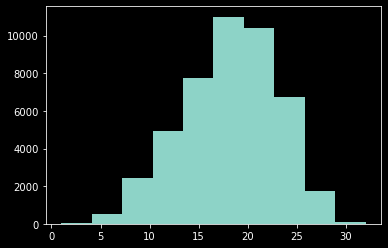

In [79]:
import matplotlib.pyplot as plt

rv_l = [len(doc) for doc in train_dataset['input_ids']]
print('Mean of the document length: {}'.format(np.mean(rv_l)))
print('Median of the document length: {}'.format(np.median(rv_l)))
print('Maximum document length: {}'.format(np.max(rv_l)))
plt.hist(rv_l)

In [89]:
zeros_app = np.zeros(2)
np.append(zeros_app,train_dataset[1]['input_ids'])

array([    0.,     0.,  4832., 34982., 34982.,  8964., 31612., 27815.,
       27218., 37895., 22531., 38278., 10024., 26417., 34676.])

We now neeed to choose a fixed sequence length, then *pad* the documents that are shorter than this maximum by adding a special token to the start of the sequence. Any documents that exceed the length will be truncated.

**TO-DO 2a:** Complete the padding code below to insert 0s at the start of any sequences that are too short, and to truncate any sequences that are too long. **(3 marks)**

In [92]:
# truncate all docs longer than this. Pad all docs shorter than this.
sequence_length = 40
def pad_text(sample):
    # WRITE YOUR OWN CODE HERE
    if len(sample['input_ids']) > sequence_length:
        sample['input_ids'] = sample['input_ids'][:sequence_length]
    else:
        dif = sequence_length - len(sample['input_ids'])
        zeros_app = np.zeros(dif)
        sample['input_ids'] = np.append(zeros_app,sample['input_ids'])
    return sample


# The map method will call pad_text for every document in the dataset
train_dataset = train_dataset.map(pad_text)


  0%|          | 0/45615 [00:00<?, ?ex/s]

We now have our data in almost the right format! To train a model using PyTorch, we are going to wrap our dataset in a [DataLoader object](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). This allows the training process to select random subsets of the dataset -- mini-batches -- which it will use for learning with a mini-batch stochastic gradient descent.

In [94]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# convert from the Huggingface format to a TensorDataset so we can use the mini-batch sampling functionality
def convert_to_data_loader(dataset, num_classes):
    # convert from list to tensor
    input_tensor = torch.from_numpy(np.array(dataset['input_ids']))
    label_tensor = torch.from_numpy(np.array(dataset['label'])).long()
    tensor_dataset = TensorDataset(input_tensor, label_tensor)
    loader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return loader

num_classes = len(np.unique(train_labels))   # number of possible labels in the sentiment analysis task

train_loader = convert_to_data_loader(train_dataset, num_classes)

Let's process the development and test set as well.

In [95]:
dev_dataset = dev_dataset.map(encode_text)
dev_dataset = dev_dataset.map(pad_text)
dev_loader = convert_to_data_loader(dev_dataset, num_classes)

test_dataset = test_dataset.map(encode_text)
test_dataset = test_dataset.map(pad_text)
test_loader = convert_to_data_loader(test_dataset, num_classes)

  0%|          | 0/2000 [00:00<?, ?ex/s]

  0%|          | 0/2000 [00:00<?, ?ex/s]

  0%|          | 0/12284 [00:00<?, ?ex/s]

  0%|          | 0/12284 [00:00<?, ?ex/s]

As shown in the diagram above, we will build a NN with three different layers for sentiment classification.

### Embedding layer
In the embedding layer, the network will create its own embeddings for the index with a given embedding dimension.
The module `nn.Embedding()` creates a simple lookup table that stores embeddings of a fixed dictionary and size.
This module is often used to store word embeddings and retrieve them using indices.
The module's input is a list of indices, and the output is the corresponding word embeddings.

[Documentation for Embedding Class](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

### Fully-connected layer
Fully-connected layers in a neural network are those layers where all the inputs from the previous layer are connected to every unit of the fully-connected layer. Here we will use fully-connected layers for the hidden layer and output layer. In Pytorch this kind of layer is implemented by the 'Linear' class:

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

## Activation functions
In Pytorch, the activation function is not included in the Linear class (or other kinds of neural network layer).
In Pytorch, we construct a neural network by connecting up the output of each component to the input of the next, thereby creating a computation graph.
To complete the hidden layer, we connect the ouput of the linear layer to a ReLU activation function, thereby creating a nonlinear function.

The cell below defines a class for our neural text classifier. The constructor creates each of the layers and the activations. The dimensions of each layer need to be correct so that the output of one layer can be passed as input to the next.

**TO-DO 2b** Complete the constructor below for a NN with three layers by adding the missing dimensions. **(2 marks)**

Below is the forward method. This is called to map the neural network's inputs to its outputs. In PyTorch, we pass data through each layer of the model, connecting them together.

**TO-DO 2c** Complete the forward method by adding the missing line. **(2 marks)**

In [199]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size
        #self.sequence_length = sequence_length
        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        ### COMPLETE THE CODE HERE: WRITE IN THE MISSING ARGUMENTS SPECIFYING THE DIMENSIONS OF EACH LAYER
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        self.hidden_layer = nn.Linear(embedding_size * sequence_length, hidden_size) # Hidden layer
        self.activation = nn.ReLU(True) # Hidden layer
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected layer
        
        ##########
        
        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)
        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size
        ### ADD THE MISSING LINES HERE TO COMPUTE h
        h = self.hidden_layer(embedded_words)
        ########
        output = self.output_layer(h)                      # (batch_size, num_classes)
        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

Now the class is complete...

**TO-DO 2d** Create a NN with the FFTextClassifier class we wrote. **(1 mark)**

**Hint:** `model = FFTextClassifier(...)`

In [200]:
vocab_size = len(vectorizer.vocabulary_) + 1
embedding_size = 10  # number of dimensions for embeddings
hidden_size = 8  # number of hidden units
# WRITE YOUR OWN CODE HERE
model = FFTextClassifier(vocab_size, sequence_length, embedding_size, hidden_size, num_classes)

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use cross-entropy loss, which is the standard loss function for classification that we also used for logistic regression. The module `nn.CrossEntropyLoss()` operates directly on the output of our output layer, so we don't have to implement the softmax layer within the forward() method.

Cross Entropy Loss: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a small number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

**TO-DO 2e** Complete the code below to compute the validation accuracy and loss after each training epoch. **(2 marks)**

In [201]:
from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # create the optimizer
    
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            # Iterate over each batch of data
            # print(f'batch no. = {i}')

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct/total_trained*100

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))

        model.eval()  # Switch model to evaluation mode
        total_correct = 0
        total_trained = 0
        dev_losses = []

        for dev_input_ids, dev_labels in dev_dataloader:
            ### WRITE YOUR OWN CODE HERE ##############
            dev_output = model(dev_input_ids)
            dev_loss = loss_fn(dev_output, dev_labels)
            ###########################################

            # Save the loss on the dev set
            dev_losses.append(dev_loss.item())

            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct/total_trained*100
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))
    return model

**TO-DO 2f:** Why is it useful to keep track of the training and dev/validation set loss or performance at each epoch? How could we use this information during training? **(3 marks)**

EXPLAIN YOUR ANSWER HERE

Monitoring indicators such as loss rate and accuracy can be used to identify the training state of the model. According to the records of these indicators, we can tune the hyperparameters, like learning rate, batch size, number of iterations (epochs), the type of activation function and so on, so as to improve the utilisation of resources and get the model with a better generalisation capability

TO-DO 2g: Finally, train the network for 10 epochs! (this to-do will not be marked)

In [202]:
### WRITE YOUR OWN CODE HERE
num_epochs = 10
train_nn(num_epochs, model, train_loader, dev_loader)

Epoch: 1/10 Training Loss: 1.0159 Training Accuracy: 44.8427%
Epoch: 1/10 Validation Loss: 1.0204 Validation Accuracy: 43.8000%
Epoch: 2/10 Training Loss: 0.9987 Training Accuracy: 47.4362%
Epoch: 2/10 Validation Loss: 1.0159 Validation Accuracy: 45.1000%
Epoch: 3/10 Training Loss: 0.9773 Training Accuracy: 49.9507%
Epoch: 3/10 Validation Loss: 0.9942 Validation Accuracy: 48.6500%
Epoch: 4/10 Training Loss: 0.9479 Training Accuracy: 52.7765%
Epoch: 4/10 Validation Loss: 0.9798 Validation Accuracy: 51.0000%
Epoch: 5/10 Training Loss: 0.9161 Training Accuracy: 55.1178%
Epoch: 5/10 Validation Loss: 0.9630 Validation Accuracy: 54.0500%
Epoch: 6/10 Training Loss: 0.8848 Training Accuracy: 57.5512%
Epoch: 6/10 Validation Loss: 0.9420 Validation Accuracy: 54.2500%
Epoch: 7/10 Training Loss: 0.8559 Training Accuracy: 59.5111%
Epoch: 7/10 Validation Loss: 0.9270 Validation Accuracy: 55.3000%
Epoch: 8/10 Training Loss: 0.8297 Training Accuracy: 61.2518%
Epoch: 8/10 Validation Loss: 0.9115 Valida

FFTextClassifier(
  (embedding_layer): Embedding(43359, 10)
  (hidden_layer): Linear(in_features=400, out_features=8, bias=True)
  (activation): ReLU(inplace=True)
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

The code below obtains predictions from our neural network.

**TO-DO 2h:** Evaluate the model on test set using the function below. Complete the code to compute a suitable performance metric for sentiment classification. **(2 mark)**

In [203]:
from sklearn.metrics import classification_report
def predict_nn(trained_model, test_loader):

    trained_model.eval()

    correct = 0  # count the number of correct classification labels

    gold_labs = []  # gold labels to return
    pred_labs = []  # predicted labels to return
    
    for inputs, labels in test_loader:
        test_output = trained_model(inputs)
        predicted_labels = test_output.argmax(1)

        gold_labs.extend(labels.tolist())
        pred_labs.extend(predicted_labels.tolist())
    
    return gold_labs, pred_labs

gold_labs, pred_labs = predict_nn(model, test_loader)

### WRITE YOUR OWN CODE HERE
print(classification_report(gold_labs, pred_labs))

              precision    recall  f1-score   support

           0       0.63      0.20      0.30      3972
           1       0.54      0.74      0.62      5937
           2       0.43      0.51      0.46      2375

    accuracy                           0.52     12284
   macro avg       0.53      0.48      0.46     12284
weighted avg       0.55      0.52      0.49     12284



Now, we can use pretrained word embeddings instead of learning them from scratch during training.
Here, we will use the pretrained GloVe embeddings that we loaded before. The embedding matrix is used to initialise the embedding layer. The code below converts the GloVe embeddings into an embedding matrix suitable for PyTorch:

In [204]:
embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))
for word in vocab:
    word_idx = vocab[word]
    if word in glove_wv:
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])
        
print(embedding_matrix)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3535,  0.0987,  0.1718,  ...,  0.4630,  1.3101,  1.1314],
        [-0.4106,  0.1487,  0.0637,  ...,  0.6097,  1.0935,  0.9614],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


The class below extends the FFTextClassifier class. This means that it inherits all of its functionality, but we overwrite the constructor (the `__init__` method). This way, we don't need to define the forward function again, as it will be the same as before.

The embedding layer is now different as it loads pretrained embeddings from our matrix. The argument `freeze` determines whether the embeddings remain fixed to their pretrained values (if `freeze=True`) or are updated through backpropagation to fit them to the dataset.

**TO-DO 2i:** Complete the arguments below to set the dimensions of the neural network layers.  Repeat the experiment above using the FFTextClassifierWithEmbeddings with the GLoVe embeddings. Compare the performance of the two neural text classifiers, and explain in a couple of sentences why you think they perform differently. **(3 marks)**

WRITE YOUR ANSWER HERE

In [209]:
import gensim.downloader


class FFTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=True) # embedding layer

        ### COMPLETE THE ARGUMENTS TO SPECIFY THE DIMENSIONS OF THE LAYERS
        self.hidden_layer = nn.Linear(self.embedding_size*sequence_length, hidden_size) # Hidden layer
        self.activation = nn.ReLU(True) # Hidden layer
        self.output_layer = nn.Linear(hidden_size,num_classes) # Full connection layer

In [212]:
### WRITE YOUR OWN CODE BELOW
model_glove = FFTextClassifierWithEmbeddings(hidden_size, num_classes)
train_nn(num_epochs, model_glove, train_loader, dev_loader)
gold_labs, pred_labs = predict_nn(model_glove, test_loader)
print(classification_report(gold_labs, pred_labs))

Epoch: 1/10 Training Loss: 1.0020 Training Accuracy: 46.7631%
Epoch: 1/10 Validation Loss: 0.9926 Validation Accuracy: 46.4500%
Epoch: 2/10 Training Loss: 0.9747 Training Accuracy: 49.0957%
Epoch: 2/10 Validation Loss: 0.9900 Validation Accuracy: 47.3500%
Epoch: 3/10 Training Loss: 0.9682 Training Accuracy: 49.8148%
Epoch: 3/10 Validation Loss: 0.9934 Validation Accuracy: 47.1500%
Epoch: 4/10 Training Loss: 0.9657 Training Accuracy: 50.0252%
Epoch: 4/10 Validation Loss: 0.9910 Validation Accuracy: 47.2000%
Epoch: 5/10 Training Loss: 0.9639 Training Accuracy: 50.1633%
Epoch: 5/10 Validation Loss: 0.9900 Validation Accuracy: 47.4000%
Epoch: 6/10 Training Loss: 0.9625 Training Accuracy: 50.1831%
Epoch: 6/10 Validation Loss: 0.9869 Validation Accuracy: 47.9000%
Epoch: 7/10 Training Loss: 0.9616 Training Accuracy: 50.1809%
Epoch: 7/10 Validation Loss: 0.9915 Validation Accuracy: 47.8500%
Epoch: 8/10 Training Loss: 0.9609 Training Accuracy: 50.4593%
Epoch: 8/10 Validation Loss: 0.9866 Valida

# 3. Improving the Neural Text Classifier (max. 22 marks)

This section allows you some more free reign to experiment with the neural text classifier. Below, we list several to-dos that you can solve in your own way. Please make sure to label your notebook cells clearly so that it is obvious which to-do each cell corresponds to.

**TO-DO 3a:** Consider the neural text classifier we have just implemented. It has a number of limitations that we could improve. Describe three limitations and how you could improve them. For each improvement you propose, provide a brief explanation (up to 1 paragraph) of how it works. **(9 marks)**

WRITE YOUR ANSWER HERE

**TO-DO 3b:** Implement your improvements and compute the performance of your method. Make sure to comment your code to show where each new step is implemented. Use the validation set for any tuning you decide to do. Present your results clearly. **(13 marks)**